In [1]:
import os

os.environ["KERAS_BACKEND"] = "torch"

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras_core import Sequential
from keras_core.layers import Dense, LSTM
import numpy as np
from sklearn.preprocessing import StandardScaler
from loading_data import get_data
from datetime import datetime

os.makedirs('models', exist_ok=True)

ImportError: cannot import name 'layers' from partially initialized module 'keras_core' (most likely due to a circular import) (/home/alex/Documents/gtc-notebook/keras_core.py)

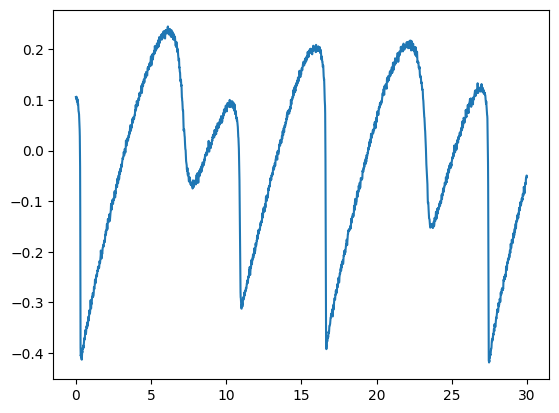

In [43]:
# exp = 'b726'
exp = 'b698'
# exp = 'i417'
# exp = 'p4679'
# exp = 'p4581'
# exp = 'cascadia'
# exp = 'sim_b726'
# exp = 'sim_b698'
# exp = 'sim_i417'

# Load your data
data, t = get_data(exp, visualise=False)

# plot first 1000 data points
plt.plot(t[:3000], data[:3000])

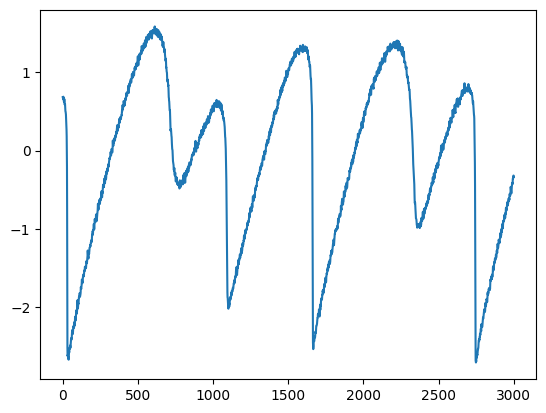

In [44]:
# Normalize your data (not sure what is happening here)
scaler = StandardScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# plot normalized data
# plt.plot(data)

# plot first 3000 data points
plt.plot(data[:3000])

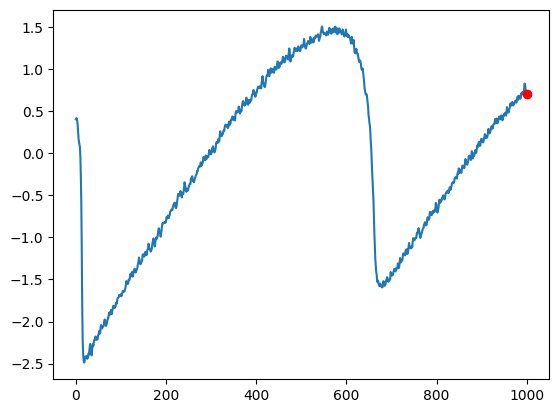

In [45]:
# one-step prediction

# Define the lookback period and prepare input-output pairs
lookback = 1000
inputs = np.array([data[i:i+lookback] for i in range(len(data)-lookback)])
outputs = data[lookback:]

random_index = np.random.randint(0, len(inputs))

# plot an input-output pair
plt.plot(inputs[random_index])
plt.plot([lookback], outputs[random_index], 'ro')

# Split the data into training and testing sets
train_inputs_1, test_inputs_1, train_outputs_1, test_outputs_1 = train_test_split(inputs, outputs, shuffle=False, test_size=0.2)

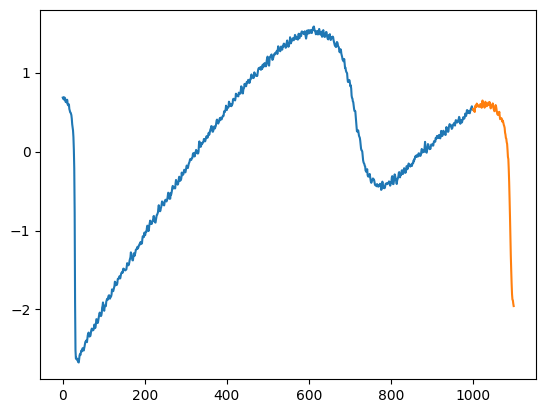

In [46]:
# multi-step prediction with multi-output model
# Define the lookback period and prepare input-output pairs
lookback = 1000
forecast_horizon = 100  # The number of points you want to predict into the future

inputs = np.array([data[i:i+lookback] for i in range(len(data)-lookback-forecast_horizon+1)])
outputs = np.array([data[i+lookback:i+lookback+forecast_horizon] for i in range(len(data)-lookback-forecast_horizon+1)])

# plot an input-output pair
plt.plot(inputs[0])
plt.plot(range(lookback, lookback+forecast_horizon), outputs[0])

train_inputs_n, test_inputs_n, train_outputs_n, test_outputs_n = train_test_split(inputs, outputs, shuffle=False, test_size=0.2) 


In [47]:
# Single step prediction with single output model
single_step_model = Sequential()
single_step_model.add(LSTM(50, activation='relu', input_shape=(lookback, 1)))
single_step_model.add(Dense(1))

single_step_model.compile(optimizer='adam', loss='mse')

/home/alex/Documents/gtc-notebook/venv/lib/python3.10/site-packages/keras_core/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
# multi-step prediction with multi-output model
# Define the LSTM model
multi_step_model = Sequential()
multi_step_model.add(LSTM(50, activation='relu', input_shape=(lookback, 1), return_sequences=True))
multi_step_model.add(Dense(forecast_horizon))

# Compile the model
multi_step_model.compile(optimizer='adam', loss='mse')


In [49]:
# Train the model
single_step_model.fit(train_inputs_1, train_outputs_1, epochs=10, verbose=1)

# Evaluate the model
mse = single_step_model.evaluate(test_inputs_1, test_outputs_1, verbose=0)
print(f'Test MSE: {mse}')

# save the model
timestamp = datetime.now().strftime("%m%d-%H%M")
single_step_model.save(f'models/{exp}_{timestamp}_{mse}_single_step.h5')

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 351s 738ms/step - loss: nan
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 331s 697ms/step - loss: nan
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 341s 718ms/step - loss: nan
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 339s 714ms/step - loss: nan
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 355s 747ms/step - loss: nan
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 344s 724ms/step - loss: nan
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 331s 698ms/step - loss: nan
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 316s 665ms/step - loss: nan
Epoch 9/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 327s 689ms/step - loss: nan
Epoch 10/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 312s 657ms/step - loss: nan
Test MSE: nan


/home/alex/Documents/gtc-notebook/venv/lib/python3.10/site-packages/keras_core/src/models/model.py:341: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


In [ ]:
multi_step_model.fit(train_inputs_n, train_outputs_n, epochs=10, verbose=1)

# Evaluate the model
mse = single_step_model.evaluate(test_inputs_1, test_outputs_1, verbose=0)
print(f'Test MSE: {mse}')

# save the model
timestamp = datetime.now().strftime("%m%d-%H%M")
multi_step_model.save(f'models/{exp}_{timestamp}_{mse}_multi_step.h5')